#  Correlation of Features


In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd


# visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


# for warnings 
import warnings
warnings.filterwarnings('ignore')

# machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, log_loss
from imblearn.over_sampling import SMOTE

# Collections
from collections import Counter

In [2]:
# Reading Data for the training files
enquiry = pd.read_csv('D:\\Projects\\Cbill\\test data\\test data\\raw_enquiry_70_new.csv')
data = pd.read_csv('D:\\Projects\\Cbill\\test data\\test data\\raw_data_70_new.csv')
account = pd.read_csv('D:\\Projects\\Cbill\\test data\\test data\\raw_account_70_new.csv')

## Enquiry Data Analysis

In [3]:
# Understanding data for Enquiry
enquiry.head()

,dt_opened,customer_no,upload_dt,enquiry_dt,enq_purpose,enq_amt
0,18-Apr-15,1,21-Apr-15,19-Dec-14,2.0,3500000.0
1,18-Apr-15,1,21-Apr-15,5-Mar-14,5.0,500000.0
2,18-Apr-15,1,21-Apr-15,5-Mar-14,0.0,50000.0
3,18-Apr-15,1,21-Apr-15,22-Feb-14,10.0,50000.0
4,18-Apr-15,1,21-Apr-15,11-Jun-13,10.0,1000.0


In [4]:
# Getting Unique count of enq_purpose to understand Spread
pd.DataFrame(enquiry.enq_purpose.value_counts())

,enq_purpose
10.0,238150
5.0,81881
1.0,23708
6.0,17426
2.0,15576
0.0,15048
13.0,11179
51.0,3942
3.0,1728
7.0,1351


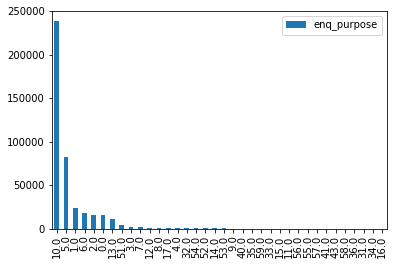

In [5]:
# understand Spread of enq_purpose
pd.DataFrame(enquiry.enq_purpose.value_counts()).plot.bar()

### Creating Correlation Plots for Enquiry

In [6]:
# Doing Correlation
# creating a list of only numerical values
categorical_enquiry = []
for col, value in enquiry.iteritems():
    if value.dtype == 'object':
        categorical_enquiry.append(col)
# Store the numerical columns in a list numerical
numerical_enquiry = enquiry.columns.difference(categorical_enquiry)

In [7]:
# Ploting the Correlation,the customer no. is not needed but I have not removed it as of now
data1 = [go.Heatmap(
        z=enquiry[numerical_enquiry].astype(float).corr().values, # Generating the Pearson correlation
        x=enquiry[numerical_enquiry].columns.values,
        y=enquiry[numerical_enquiry].columns.values,
        colorscale='Viridis',
        reversescale = False,
        
    )
]
layout = go.Layout(
    title='Pearson Correlation for Enquiry Data',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 800, height = 700,
    
)

fig = go.Figure(data=data1, layout=layout)
py.iplot(fig, filename='labelled-heatmap')


### Understanding the account data

In [8]:
# Look at top 6 rows of data
account.head()

,dt_opened,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,...,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount
0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,05-Jul-14,30-Sep-15,20900.0,...,NaN,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",NaN,01-Sep-15,01-Jul-14,NaN,NaN,NaN,NaN,NaN
1,10-Nov-15,12265,20-Oct-15,10,1,25-May-12,06-Sep-15,NaN,03-Oct-15,16201.0,...,NaN,"""""""0000000000000000000000000000000000000000000...","""""""000000000000000000000000000XXX0000000000000...",01-Oct-15,01-Nov-12,14000.0,1400.0,NaN,3.0,5603.0
2,10-Nov-15,12265,20-Oct-15,10,1,22-Mar-12,31-Aug-15,NaN,30-Sep-15,41028.0,...,NaN,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Sep-15,01-Oct-12,NaN,NaN,NaN,NaN,NaN
3,20-Jul-15,15606,09-Jul-15,10,1,13-Jan-06,NaN,26-Jul-07,31-Jan-09,93473.0,...,NaN,"""""""1200900600600600300000000000000000000000000...",NaN,01-Jul-07,01-Feb-06,NaN,NaN,NaN,NaN,NaN
4,20-Jul-15,15606,09-Jul-15,6,1,18-Jan-15,05-May-15,NaN,31-May-15,20250.0,...,NaN,"""""""000000000000000""""""",NaN,01-May-15,01-Jan-15,NaN,NaN,NaN,NaN,NaN


In [9]:
# Which column has what kind of data
account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186329 entries, 0 to 186328
Data columns (total 21 columns):
dt_opened              186329 non-null object
customer_no            186329 non-null int64
upload_dt              186329 non-null object
acct_type              186329 non-null int64
owner_indic            186329 non-null int64
opened_dt              185874 non-null object
last_paymt_dt          160842 non-null object
closed_dt              77254 non-null object
reporting_dt           186329 non-null object
high_credit_amt        177454 non-null float64
cur_balance_amt        186329 non-null int64
amt_past_due           876 non-null float64
paymenthistory1        186329 non-null object
paymenthistory2        78505 non-null object
paymt_str_dt           186328 non-null object
paymt_end_dt           186328 non-null object
creditlimit            48852 non-null float64
cashlimit              35282 non-null float64
rateofinterest         24833 non-null object
paymentfrequency       

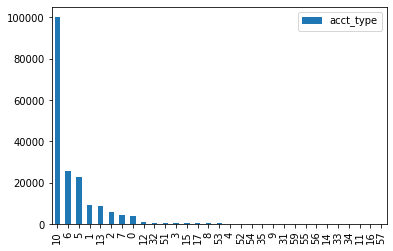

In [10]:
# Let us try to understand few of the categorical columns
# understand Spread of acct_type
pd.DataFrame(account.acct_type.value_counts()).plot.bar()

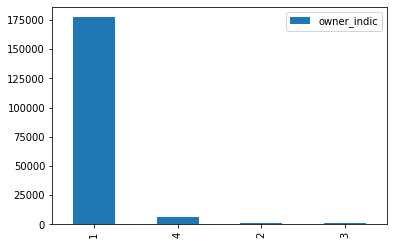

In [11]:
# understand Spread of owner_indic
pd.DataFrame(account.owner_indic.value_counts()).plot.bar()

In [12]:
# We can do a lot of EDA than this but skipping it as of now

### Creating Correlation Plots for Account Data

In [13]:
# creating a list of only numerical values
categorical_account = []
for col, value in account.iteritems():
    if value.dtype == 'object':
        categorical_account.append(col)

# Store the numerical columns in a list numerical
numerical_account = account.columns.difference(categorical_account)

data2 = [go.Heatmap(
        z=account[numerical_account].astype(float).corr().values, # Generating the Pearson correlation
        x=account[numerical_account].columns.values,
        y=account[numerical_account].columns.values,
        colorscale='Viridis',
        reversescale = False,
        opacity = 1.0
        
    )
]
layout = go.Layout(
    title='Pearson Correlation for Account Data',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 800, height = 700,
    
)


fig = go.Figure(data=data2, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

### Creating Correlation Plots for Data 

In [14]:
# Droping the feature_6 as we need to predict it
data= data.drop(['feature_6'],axis=1)

In [15]:
# understand Spread of Bad_label
pd.DataFrame(data.Bad_label.value_counts(normalize=True))

# The Bad Flag is very low , 0.04 percentage of Total

,Bad_label
0,0.957985
1,0.042015


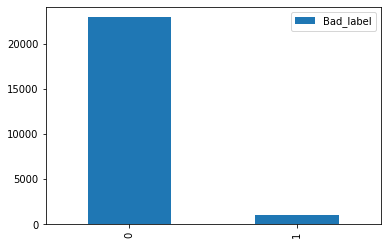

In [16]:
# understand Spread of Bad_label, by graph
pd.DataFrame(data.Bad_label.value_counts()).plot.bar()

In [17]:
# creating a list of only numerical values
categorical_data = []
for col, value in data.iteritems():
    if value.dtype == 'object':
        categorical_data.append(col)

# Store the numerical columns in a list numerical
numerical_data = data.columns.difference(categorical_data)

data3 = [go.Heatmap(
        z=data[numerical_data].astype(float).corr().values, # Generating the Pearson correlation
        x=data[numerical_data].columns.values,
        y=data[numerical_data].columns.values,
        colorscale='Viridis',
        reversescale = False,
        opacity = 1.0
        
    )
]


layout = go.Layout(
    title='Pearson Correlation for Data',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 800, height = 700,
    
)


fig = go.Figure(data=data3, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

In [18]:
# There are some feature with correlation as one, let us find them

# Get diagonal and lower triangular pairs of correlation matrix
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Get top pairs of correlation matrix
def get_top_abs_correlations(df, n=5):
    '''Get top pairs of correlation matrix'''
    pairs_to_drop = set()
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]



In [19]:
# Getting top 5 Pairs for correlations
print("Top Absolute Correlations for Data file")
# Making sure input is only the categorical columns to the function
print(get_top_abs_correlations(data[numerical_data], 5))

Top Absolute Correlations for Data file
feature_34  feature_68    1.000000
feature_35  feature_69    1.000000
feature_34  feature_39    0.995821
feature_39  feature_68    0.995821
feature_29  feature_44    0.983200
dtype: float64


In [20]:
# Getting top 5 Pairs for correlations for Account data
print("Top Absolute Correlations for Account data")
# Making sure input is only the categorical columns to the function
print(get_top_abs_correlations(account[numerical_account], 5))

Top Absolute Correlations for Account data
actualpaymentamount  high_credit_amt    0.769984
cashlimit            creditlimit        0.758459
cur_balance_amt      high_credit_amt    0.755600
actualpaymentamount  cur_balance_amt    0.721505
creditlimit          high_credit_amt    0.502603
dtype: float64


### Creating Features for Data Understanding

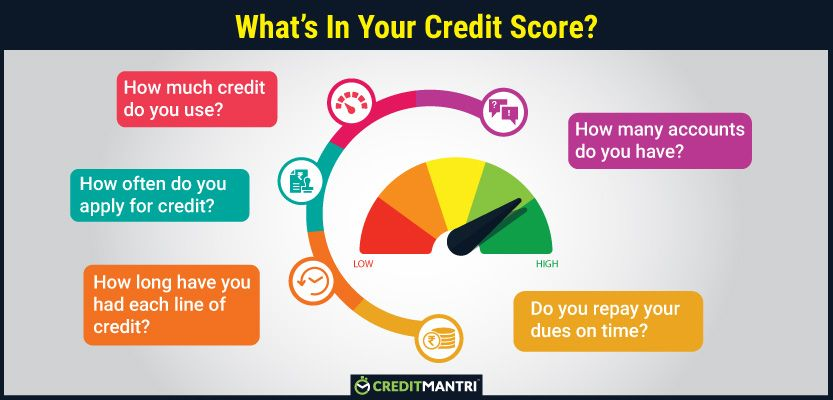

In [21]:
# Understanding what is more important for the credit score
# While I did google search for the analysis, I found out following things about credit score.
# Let us now create features depending on weight given to each segment of score calculation so we can get better results
from IPython.display import Image
Image(filename='your-credit-scores.jpg') 

In [22]:
enquiry_test = pd.read_csv('D:\\Projects\\Cbill\\test data\\test data\\raw_enquiry_30_new.csv')
data_test = pd.read_csv('D:\\Projects\\Cbill\\test data\\test data\\raw_data_30_new.csv')
account_test = pd.read_csv('D:\\Projects\\Cbill\\test data\\test data\\raw_account_30_new.csv')

In [23]:
# Merge train and test enquiry data here in order to create features all at once
enquiry_joined =pd.concat([enquiry,enquiry_test],keys=('train','test'))

# Getting shape of the merged data
print(enquiry_joined.shape)

# Merge train and test account data here in order to create features all at once
account_joined =pd.concat([account,account_test],keys=('train','test'))

# Getting shape of the merged data
print(account_joined.shape)

# Merge train and test data of data file here in order to create features all at once
data_joined =pd.concat([data,data_test],keys=('train','test'))

# Getting shape of the merged data
print(data_joined.shape)

(586687, 6)
(265897, 21)
(34136, 83)


In [24]:
data_joined.head()

Bad_label  customer_no  dt_opened entry_time feature_1 feature_10  \
train 0          0            1  18-Apr-15  13-Apr-15  Insignia        NaN   
      1          0            2  21-Apr-15  21-Apr-15  Insignia        NaN   
      2          0            3  22-Apr-15  21-Apr-15  Insignia        NaN   
      3          0            4  25-Apr-15  15-Apr-15  Insignia        NaN   
      4          0            5   6-May-15  30-Apr-15  Insignia        NaN   

        feature_11 feature_12 feature_13  feature_14  ... feature_72  \
train 0          Y        IS1        NaN         0.0  ...          R   
      1          Y        IS1        NaN         0.0  ...          R   
      2          Y        IS1        NaN         0.0  ...          R   
      3          Y        IS1        NaN         0.0  ...          R   
      4          Y        IS1        NaN         0.0  ...          R   

        feature_73 feature_74  feature_75  feature_76  feature_77 feature_78  \
train 0        NaN        NaN  0000-00-00         0.0  98332XXXXX        1.0   
      1        NaN        NaN  0000-00-00         0.0  99455XXXXX        1.0   
      2        NaN        NaN  0000-00-00         0.0  98456XXXXX        1.0   
      3        NaN        NaN     6/15/65         1.0  98220XXXXX        1.0   
      4        NaN        NaN  0000-00-00         0.0  98111XXXXX        1.0   

        feature_79 feature_8 feature_9  
train 0          N       NaN       NaN  
      1          N       NaN       NaN  
      2          N       NaN       NaN  
      3          N       NaN       NaN  
      4          N       NaN       NaN  

[5 rows x 83 columns]

In [25]:
# Now let us do the feature engineering 
# Let us create data for recency of enquiry for 365 days
# Converting the data to date time so we can do date calculations easily
enquiry_dt = pd.to_datetime(enquiry_joined['enquiry_dt'])
dt_opened = pd.to_datetime(enquiry_joined['dt_opened'])

# Creating colum for count of enquiry
enquiry_joined['count_enquiry_recency_365'] = dt_opened - enquiry_dt 

enquiry_count = enquiry_joined[(enquiry_joined.count_enquiry_recency_365<= '365days')]
group = enquiry_count.groupby(enquiry_count['customer_no'])
group1 = group.count()
enqCount = group1.loc[:,['count_enquiry_recency_365']]
data_joined = data_joined.join(enqCount, on='customer_no')
data_joined.count_enquiry_recency_365.fillna(0, inplace=True)
data_joined.head()

Bad_label  customer_no  dt_opened entry_time feature_1 feature_10  \
train 0          0            1  18-Apr-15  13-Apr-15  Insignia        NaN   
      1          0            2  21-Apr-15  21-Apr-15  Insignia        NaN   
      2          0            3  22-Apr-15  21-Apr-15  Insignia        NaN   
      3          0            4  25-Apr-15  15-Apr-15  Insignia        NaN   
      4          0            5   6-May-15  30-Apr-15  Insignia        NaN   

        feature_11 feature_12 feature_13  feature_14  ... feature_73  \
train 0          Y        IS1        NaN         0.0  ...        NaN   
      1          Y        IS1        NaN         0.0  ...        NaN   
      2          Y        IS1        NaN         0.0  ...        NaN   
      3          Y        IS1        NaN         0.0  ...        NaN   
      4          Y        IS1        NaN         0.0  ...        NaN   

        feature_74  feature_75 feature_76  feature_77 feature_78 feature_79  \
train 0        NaN  0000-00-00        0.0  98332XXXXX        1.0          N   
      1        NaN  0000-00-00        0.0  99455XXXXX        1.0          N   
      2        NaN  0000-00-00        0.0  98456XXXXX        1.0          N   
      3        NaN     6/15/65        1.0  98220XXXXX        1.0          N   
      4        NaN  0000-00-00        0.0  98111XXXXX        1.0          N   

        feature_8 feature_9 count_enquiry_recency_365  
train 0       NaN       NaN                       4.0  
      1       NaN       NaN                      19.0  
      2       NaN       NaN                       1.0  
      3       NaN       NaN                       2.0  
      4       NaN       NaN                       2.0  

[5 rows x 84 columns]

In [26]:
# Now let us do the feature engineering 
# Let us create data for recency of enquiry for 90 days

# Creating colum for count of enquiry for 90 days
enquiry_joined['count_enquiry_recency_90'] = dt_opened - enquiry_dt 

enquiry_count = enquiry_joined[(enquiry_joined.count_enquiry_recency_90<= '90days')]
group = enquiry_count.groupby(enquiry_count['customer_no'])
group1 = group.count()
enqCount = group1.loc[:,['count_enquiry_recency_90']]
data_joined = data_joined.join(enqCount, on='customer_no')
data_joined.count_enquiry_recency_90.fillna(0, inplace=True)
data_joined.head()

Bad_label  customer_no  dt_opened entry_time feature_1 feature_10  \
train 0          0            1  18-Apr-15  13-Apr-15  Insignia        NaN   
      1          0            2  21-Apr-15  21-Apr-15  Insignia        NaN   
      2          0            3  22-Apr-15  21-Apr-15  Insignia        NaN   
      3          0            4  25-Apr-15  15-Apr-15  Insignia        NaN   
      4          0            5   6-May-15  30-Apr-15  Insignia        NaN   

        feature_11 feature_12 feature_13  feature_14  ... feature_74  \
train 0          Y        IS1        NaN         0.0  ...        NaN   
      1          Y        IS1        NaN         0.0  ...        NaN   
      2          Y        IS1        NaN         0.0  ...        NaN   
      3          Y        IS1        NaN         0.0  ...        NaN   
      4          Y        IS1        NaN         0.0  ...        NaN   

         feature_75 feature_76  feature_77  feature_78 feature_79 feature_8  \
train 0  0000-00-00        0.0  98332XXXXX         1.0          N       NaN   
      1  0000-00-00        0.0  99455XXXXX         1.0          N       NaN   
      2  0000-00-00        0.0  98456XXXXX         1.0          N       NaN   
      3     6/15/65        1.0  98220XXXXX         1.0          N       NaN   
      4  0000-00-00        0.0  98111XXXXX         1.0          N       NaN   

        feature_9 count_enquiry_recency_365 count_enquiry_recency_90  
train 0       NaN                       4.0                      0.0  
      1       NaN                      19.0                      2.0  
      2       NaN                       1.0                      1.0  
      3       NaN                       2.0                      0.0  
      4       NaN                       2.0                      0.0  

[5 rows x 85 columns]

In [27]:
# How many days are taken on an average for an enquiry after account opening
enquiry_joined['mean_diff_open_enquiry_dt'] = dt_opened - enquiry_dt 

# Calculate Mean
enquiry_count = enquiry_joined.groupby("customer_no")["mean_diff_open_enquiry_dt"].apply(lambda x: x.mean())

# Get days
enq_days= enquiry_count.dt.days

# Join the data
data_joined = data_joined.join(enq_days, on='customer_no')
data_joined.mean_diff_open_enquiry_dt.fillna(0, inplace=True)
data_joined.head()

Bad_label  customer_no  dt_opened entry_time feature_1 feature_10  \
train 0          0            1  18-Apr-15  13-Apr-15  Insignia        NaN   
      1          0            2  21-Apr-15  21-Apr-15  Insignia        NaN   
      2          0            3  22-Apr-15  21-Apr-15  Insignia        NaN   
      3          0            4  25-Apr-15  15-Apr-15  Insignia        NaN   
      4          0            5   6-May-15  30-Apr-15  Insignia        NaN   

        feature_11 feature_12 feature_13  feature_14  ...  feature_75  \
train 0          Y        IS1        NaN         0.0  ...  0000-00-00   
      1          Y        IS1        NaN         0.0  ...  0000-00-00   
      2          Y        IS1        NaN         0.0  ...  0000-00-00   
      3          Y        IS1        NaN         0.0  ...     6/15/65   
      4          Y        IS1        NaN         0.0  ...  0000-00-00   

        feature_76  feature_77 feature_78  feature_79 feature_8 feature_9  \
train 0        0.0  98332XXXXX        1.0           N       NaN       NaN   
      1        0.0  99455XXXXX        1.0           N       NaN       NaN   
      2        0.0  98456XXXXX        1.0           N       NaN       NaN   
      3        1.0  98220XXXXX        1.0           N       NaN       NaN   
      4        0.0  98111XXXXX        1.0           N       NaN       NaN   

        count_enquiry_recency_365 count_enquiry_recency_90  \
train 0                       4.0                      0.0   
      1                      19.0                      2.0   
      2                       1.0                      1.0   
      3                       2.0                      0.0   
      4                       2.0                      0.0   

        mean_diff_open_enquiry_dt  
train 0                    1378.0  
      1                     828.0  
      2                    1832.0  
      3                    1977.0  
      4                     880.0  

[5 rows x 86 columns]

In [28]:
# Getting the purpose of most recent enquiry purpose
purpose_enq = enquiry_joined.groupby("customer_no")["enq_purpose"].apply(lambda x: x.max()) # To get most frequent enquiry purpose
data_joined = data_joined.join(purpose_enq, on='customer_no')
data_joined.rename(columns={ 'enq_purpose' : 'max_freq_enquiry' },inplace=True) # rename the lable to max_freq_enquiry
data_joined["max_freq_enquiry"] = data_joined["max_freq_enquiry"].fillna(0.0).astype(int)
data_joined.head()

Bad_label  customer_no  dt_opened entry_time feature_1 feature_10  \
train 0          0            1  18-Apr-15  13-Apr-15  Insignia        NaN   
      1          0            2  21-Apr-15  21-Apr-15  Insignia        NaN   
      2          0            3  22-Apr-15  21-Apr-15  Insignia        NaN   
      3          0            4  25-Apr-15  15-Apr-15  Insignia        NaN   
      4          0            5   6-May-15  30-Apr-15  Insignia        NaN   

        feature_11 feature_12 feature_13  feature_14  ... feature_76  \
train 0          Y        IS1        NaN         0.0  ...        0.0   
      1          Y        IS1        NaN         0.0  ...        0.0   
      2          Y        IS1        NaN         0.0  ...        0.0   
      3          Y        IS1        NaN         0.0  ...        1.0   
      4          Y        IS1        NaN         0.0  ...        0.0   

         feature_77 feature_78 feature_79  feature_8 feature_9  \
train 0  98332XXXXX        1.0          N        NaN       NaN   
      1  99455XXXXX        1.0          N        NaN       NaN   
      2  98456XXXXX        1.0          N        NaN       NaN   
      3  98220XXXXX        1.0          N        NaN       NaN   
      4  98111XXXXX        1.0          N        NaN       NaN   

        count_enquiry_recency_365 count_enquiry_recency_90  \
train 0                       4.0                      0.0   
      1                      19.0                      2.0   
      2                       1.0                      1.0   
      3                       2.0                      0.0   
      4                       2.0                      0.0   

        mean_diff_open_enquiry_dt max_freq_enquiry  
train 0                    1378.0               51  
      1                     828.0               54  
      2                    1832.0               10  
      3                    1977.0               52  
      4                     880.0               51  

[5 rows x 87 columns]

In [1]:
# Similar to this we can create more features such as followings

# 1. Ratio of Current balance and credit limit
# 2. Utilization Trend of Customer
# 3. Average of payment duration
# 4. Average ammount of Enquiry
# We can do many more features like this


# I will be creating a seprate file for train and test cleaning


In [29]:
# Now let us check how many missing values are there in the columns and their percentage

merge_data = data_joined

# Total missing values in every column
total_missing = merge_data.isnull().sum()

# Calculate percentage
percentge = total_missing/merge_data.isnull().count()

# Combine total and percentage values
NAs = pd.concat([total_missing,percentge],axis=1,keys=('Total','Percentge'))

# Getting columns where there are missing values
NAs[NAs.Total>0].sort_values(by='Total',ascending=False)

,Total,Percentge
feature_61,34121,0.999561
feature_74,34112,0.999297
feature_18,34105,0.999092
feature_10,34065,0.997920
feature_49,33977,0.995342
feature_17,32681,0.957376
feature_9,32343,0.947475
feature_8,32343,0.947475
feature_57,30705,0.899490
feature_73,29917,0.876406


In [30]:
# Droping Columns where NA is more than 40 Percentages
list(NAs.Percentge [NAs.Percentge > .4].index)

['feature_10',
 'feature_13',
 'feature_17',
 'feature_18',
 'feature_45',
 'feature_48',
 'feature_49',
 'feature_51',
 'feature_53',
 'feature_57',
 'feature_6',
 'feature_61',
 'feature_73',
 'feature_74',
 'feature_8',
 'feature_9']